
# California Housing: сравнение классических алгоритмов и нейронной сети





## 1. Загрузка библиотек


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



## 2. Загрузка и описание датасета


In [2]:

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



### Основная информация о данных


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB



## 3. Первичный анализ данных (EDA)


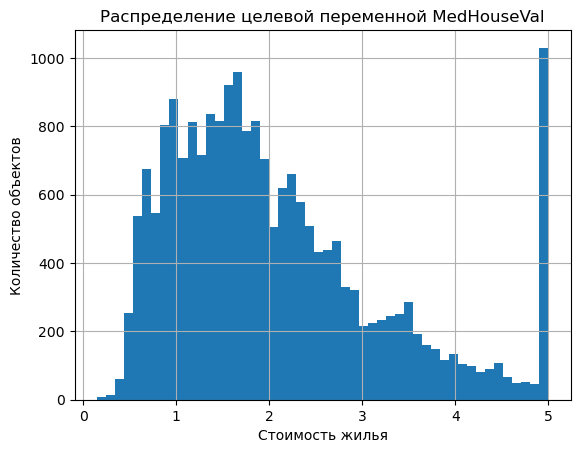

In [4]:

df['MedHouseVal'].hist(bins=50)
plt.title("Распределение целевой переменной MedHouseVal")
plt.xlabel("Стоимость жилья")
plt.ylabel("Количество объектов")
plt.show()


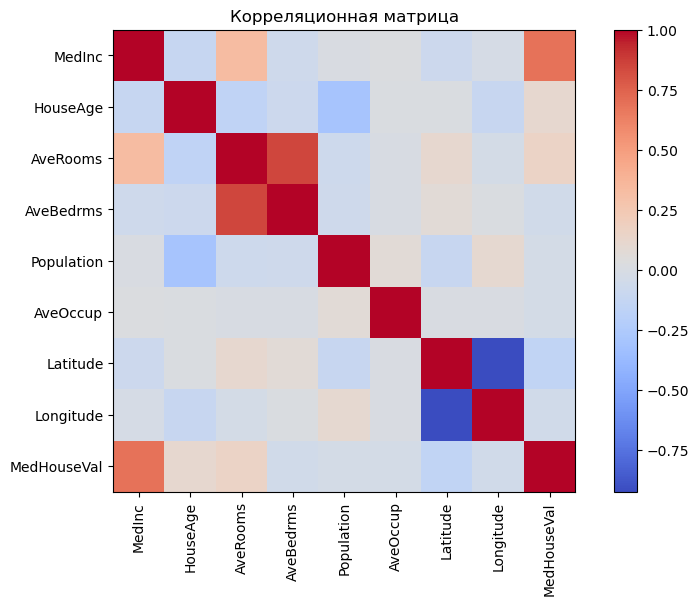

In [5]:

corr = df.corr()

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Корреляционная матрица")
plt.show()



## 4. Предобработка данных


In [6]:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 5. Базовая модель — линейная регрессия


In [7]:

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)


lr_mae, lr_rmse, lr_r2


(0.5332001304956565, np.float64(0.7455813830127763), 0.575787706032451)


## 6. Random Forest


In [8]:

knn = KNeighborsRegressor(
    n_neighbors=10,
    weights='distance',
    metric='minkowski'
)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2 = r2_score(y_test, y_pred_knn)

knn_mae, knn_rmse, knn_r2


(0.4367677275399463, np.float64(0.6452412314531308), 0.6822852607999947)


## 7. Нейросетевая модель (MLP)


In [9]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300


F:\programms\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0983 - val_loss: 0.4864
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4132 - val_loss: 0.4166
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3774 - val_loss: 0.4210
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3629 - val_loss: 0.3835
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3519 - val_loss: 0.3783
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3427 - val_loss: 0.3662
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3335 - val_loss: 0.3671
Epoch 8/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3340 - val_loss: 0.3605
Epoch 9/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3225 - val_loss: 0.3589
Epoch 10/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3126 - val_loss: 0.3675
Epoch 11/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3180 - val_loss: 0.3980
Epoch 12/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [10]:

y_pred_nn = model.predict(X_test_scaled).flatten()

nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_r2 = r2_score(y_test, y_pred_nn)

nn_mae, nn_rmse, nn_r2


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step


(0.3468756588239748, np.float64(0.5245496757316499), 0.7900255821815682)


## 8. Сравнение моделей


In [14]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Neural Network'],
    'MAE': [lr_mae, knn_mae, nn_mae],
    'RMSE': [lr_rmse, knn_rmse, nn_rmse],
    'R2': [lr_r2, knn_r2, nn_r2]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,0.533200,0.745581,0.575788
1,KNN,0.436768,0.645241,0.682285
2,Neural Network,0.346876,0.524550,0.790026



## 9. Визуализация предсказаний нейросети


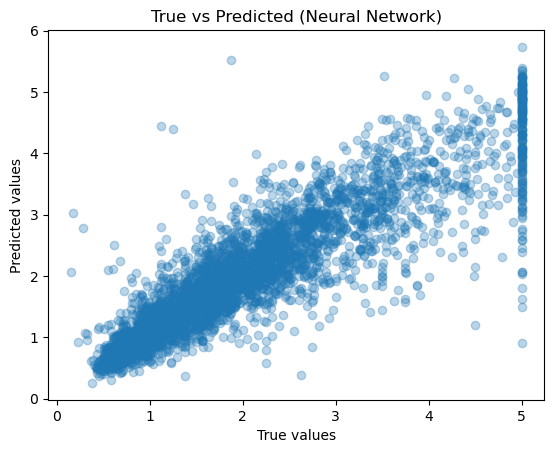

In [15]:

plt.scatter(y_test, y_pred_nn, alpha=0.3)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted (Neural Network)")
plt.show()



## 10. Выводы

- Линейная регрессия показала слабое качество из-за линейных предположений  
- KNN не значительно улучшил результаты  
- Нейронная сеть показала наилучшие метрики качества  
- Нейросети эффективно моделируют нелинейные зависимости в данных
